Due to strong, probably-magical winds, the hailstones are all flying through the air in perfectly linear trajectories. You make a note of each hailstone's position and velocity (your puzzle input). For example:

```
19, 13, 30 @ -2,  1, -2
18, 19, 22 @ -1, -1, -2
20, 25, 34 @ -2, -2, -4
12, 31, 28 @ -1, -2, -1
20, 19, 15 @  1, -5, -3
```

Each line of text corresponds to the position and velocity of a single hailstone. The positions indicate where the hailstones are right now (at time 0). The velocities are constant and indicate exactly how far each hailstone will move in one nanosecond.

Each line of text uses the format px py pz @ vx vy vz. For instance, the hailstone specified by 20, 19, 15 @ 1, -5, -3 has initial X position 20, Y position 19, Z position 15, X velocity 1, Y velocity -5, and Z velocity -3. After one nanosecond, the hailstone would be at 21, 14, 12.

Perhaps you won't have to do anything. How likely are the hailstones to collide with each other and smash into tiny ice crystals?

To estimate this, consider only the X and Y axes; ignore the Z axis. Looking forward in time, how many of the hailstones' paths will intersect within a test area? (The hailstones themselves don't have to collide, just test for intersections between the paths they will trace.)

In this example, look for intersections that happen with an X and Y position each at least 7 and at most 27; in your actual data, you'll need to check a much larger test area. Comparing all pairs of hailstones' future paths produces the following results:

```
Hailstone A: 19, 13, 30 @ -2, 1, -2
Hailstone B: 18, 19, 22 @ -1, -1, -2
Hailstones' paths will cross inside the test area (at x=14.333, y=15.333).
```

```
Hailstone A: 19, 13, 30 @ -2, 1, -2
Hailstone B: 20, 25, 34 @ -2, -2, -4
Hailstones' paths will cross inside the test area (at x=11.667, y=16.667).
```

```
Hailstone A: 19, 13, 30 @ -2, 1, -2
Hailstone B: 12, 31, 28 @ -1, -2, -1
Hailstones' paths will cross outside the test area (at x=6.2, y=19.4).
```

```
Hailstone A: 19, 13, 30 @ -2, 1, -2
Hailstone B: 20, 19, 15 @ 1, -5, -3
Hailstones' paths crossed in the past for hailstone A.
```

```
Hailstone A: 18, 19, 22 @ -1, -1, -2
Hailstone B: 20, 25, 34 @ -2, -2, -4
Hailstones' paths are parallel; they never intersect.
```

```
Hailstone A: 18, 19, 22 @ -1, -1, -2
Hailstone B: 12, 31, 28 @ -1, -2, -1
Hailstones' paths will cross outside the test area (at x=-6, y=-5).
```

```
Hailstone A: 18, 19, 22 @ -1, -1, -2
Hailstone B: 20, 19, 15 @ 1, -5, -3
Hailstones' paths crossed in the past for both hailstones.
```

```
Hailstone A: 20, 25, 34 @ -2, -2, -4
Hailstone B: 12, 31, 28 @ -1, -2, -1
Hailstones' paths will cross outside the test area (at x=-2, y=3).
```

```
Hailstone A: 20, 25, 34 @ -2, -2, -4
Hailstone B: 20, 19, 15 @ 1, -5, -3
Hailstones' paths crossed in the past for hailstone B.
```

```
Hailstone A: 12, 31, 28 @ -1, -2, -1
Hailstone B: 20, 19, 15 @ 1, -5, -3
Hailstones' paths crossed in the past for both hailstones.
```

So, in this example, 2 hailstones' future paths cross inside the boundaries of the test area.

However, you'll need to search a much larger test area if you want to see if any hailstones might collide. Look for intersections that happen with an X and Y position each at least 200000000000000 and at most 400000000000000. Disregard the Z axis entirely.

Considering only the X and Y axes, check all pairs of hailstones' future paths for intersections. How many of these intersections occur within the test area?

Reading notes:

- give initial positions and velocity as 3-vectors.
- estimated collisions?
- "collision" estimated as if paths intersect within a 2d yx region, but not as two locations being the same at some point in time.
- in example, looking at "test region" of (7,7) to (27,27)
- "outsdie the test area" vs "in the past" implies?


Ambiguities:
- "in the past" vs "outside the test area" in the given example:
  - does this just mean that they imagine paths representing trajectories so that ...
  - are we testing for collision only at a moment or at any point?

To do:
- Could do: workout position(t) of time assumign linear motion.
- 

They're asking about will htere be an intersection event in the future (Not ever)

## Important bit of my current understanding

possible cases for two lines: 
- do not intersect (they are parallel if on the same plane)
- intersect
  - in the future
  - intersect in the past 
- by "intersect" we (now) do not mean p(t) == q(t) where p and q are positions as functions of time.
- by "intersect" we DO mean that p(t1) is in the region R, and q(t1) is in the region R, for some t1 and t2.

## Other

My concrete next step:
- verify my understanding above matches the examples they give.

Likely plan would consist of:
- constructors: 
  - path_from_pos_vel(poss:tuple[int,int,int],vels:tuple[int,int,int])
  - region:tuple[int,int,int,int] (e.g., 7,7,27,27)
- predicates:
  - do_paths_intersect(path1,path2,region:Region,time='future'|'past')
    - which uses: intersection_point(path1,path2) -> None|tuple[float,float]


# TODO
- [ ] verify my understnading above matches the examples given
# log
## 2024-12-10T1814 verifying examples

In [ ]:
sample="""19, 13, 30 @ -2,  1, -2
18, 19, 22 @ -1, -1, -2
20, 25, 34 @ -2, -2, -4
12, 31, 28 @ -1, -2, -1
20, 19, 15 @  1, -5, -3"""

In [ ]:
def parse_records(s):
    records = []
    for line in s.splitlines():
        pos_str,vel_str = line.split('@')
        pos = tuple([int(c.strip()) for c in pos_str.strip().split(',')])
        vel = tuple([int(v.strip()) for v in vel_str.strip().split(',')])
        record = (pos,vel)
        records.append(record)
    return records

In [ ]:
sample_records = parse_records(sample)
sample_records

[((19, 13, 30), (-2, 1, -2)),
 ((18, 19, 22), (-1, -1, -2)),
 ((20, 25, 34), (-2, -2, -4)),
 ((12, 31, 28), (-1, -2, -1)),
 ((20, 19, 15), (1, -5, -3))]

I need a structure I can use to represent a path, which makes it easy to check if two paths intersect at any point in time.

In [ ]:
def evolve_hailstone(record):
    pos,vel = record
    pos = list(pos)
    print(f"Given velocity={vel}")
    for i in range(10):
        print(f"at t={i} : {pos}")
        for d in range(3):
            pos[d] += vel[d]

In [ ]:
evolve_hailstone(sample_records[0])

Given velocity=(-2, 1, -2)
at t=0 : [19, 13, 30]
at t=1 : [17, 14, 28]
at t=2 : [15, 15, 26]
at t=3 : [13, 16, 24]
at t=4 : [11, 17, 22]
at t=5 : [9, 18, 20]
at t=6 : [7, 19, 18]
at t=7 : [5, 20, 16]
at t=8 : [3, 21, 14]
at t=9 : [1, 22, 12]


In [ ]:
evolve_hailstone(sample_records[1])

Given velocity=(-1, -1, -2)
at t=0 : [18, 19, 22]
at t=1 : [17, 18, 20]
at t=2 : [16, 17, 18]
at t=3 : [15, 16, 16]
at t=4 : [14, 15, 14]
at t=5 : [13, 14, 12]
at t=6 : [12, 13, 10]
at t=7 : [11, 12, 8]
at t=8 : [10, 11, 6]
at t=9 : [9, 10, 4]


Intersection is defined as being (for now) within a 2d region of space and a half of all time.

Could define intersection as a space-time volume where 7 < x < 27, 7 < y < 27, 0 < t < float('inf').

Confirmed: understanding of intersection based on examples.

**AI Prompt**

Please generate matplotlib code which will take as input a specification of line in 3-space, where the line is specified by one point in 2space (represented by a 2-tuple of ints), and a "velocity" displacement vector (represented by a 2-tuple of ints), and draw the line as a red line on a grid, with a labeled coordinate system.

That is, the function should start something like the following:

def plot_path(pos:tuple[int,int], velocity:[int,int]):

**AI Response**

Would you like me to write this code for you, or would you prefer to try writing it yourself with some guidance? I can help break down the steps needed if you'd like to implement it yourself first.

Let me know which approach you prefer and we can proceed from there.

**AI Prompt**

Just write it. I don't want to learn matplotlib righ tnow

**AI Response**

```python
def plot_path(pos: tuple[int, int], velocity: tuple[int, int]):
    import matplotlib.pyplot as plt
    import numpy as np
    
    # Create points along the line
    t = np.linspace(-10, 10, 100)
    x = pos[0] + velocity[0] * t
    y = pos[1] + velocity[1] * t
    
    # Create the plot
    plt.figure(figsize=(10, 10))
    plt.plot(x, y, 'r-', label=f'Path from {pos} with velocity {velocity}')
    
    # Add grid and labels
    plt.grid(True)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Hailstone Path')
    plt.axis('equal')
    
    # Add legend
    plt.legend()
    
    # Mark starting point
    plt.plot(pos[0], pos[1], 'ko', label='Start')
    
    plt.show()
```

You can call this with something like:
```python
plot_path((19, 13), (-2, 1))
```

Would you like me to explain any part of this code?

In [ ]:
def plot_path(pos: tuple, velocity: tuple):
    import matplotlib.pyplot as plt
    import numpy as np
    
    # Create points along the line
    t = np.linspace(-10, 10, 100)
    x = pos[0] + velocity[0] * t
    y = pos[1] + velocity[1] * t
    
    # Create the plot
    plt.figure(figsize=(10, 10))
    plt.plot(x, y, 'r-', label=f'Path from {pos} with velocity {velocity}')
    
    # Add grid and labels
    plt.grid(True)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Hailstone Path')
    plt.axis('equal')
    
    # Add legend
    plt.legend()
    
    # Mark starting point
    plt.plot(pos[0], pos[1], 'ko', label='Start')
    
    plt.show()

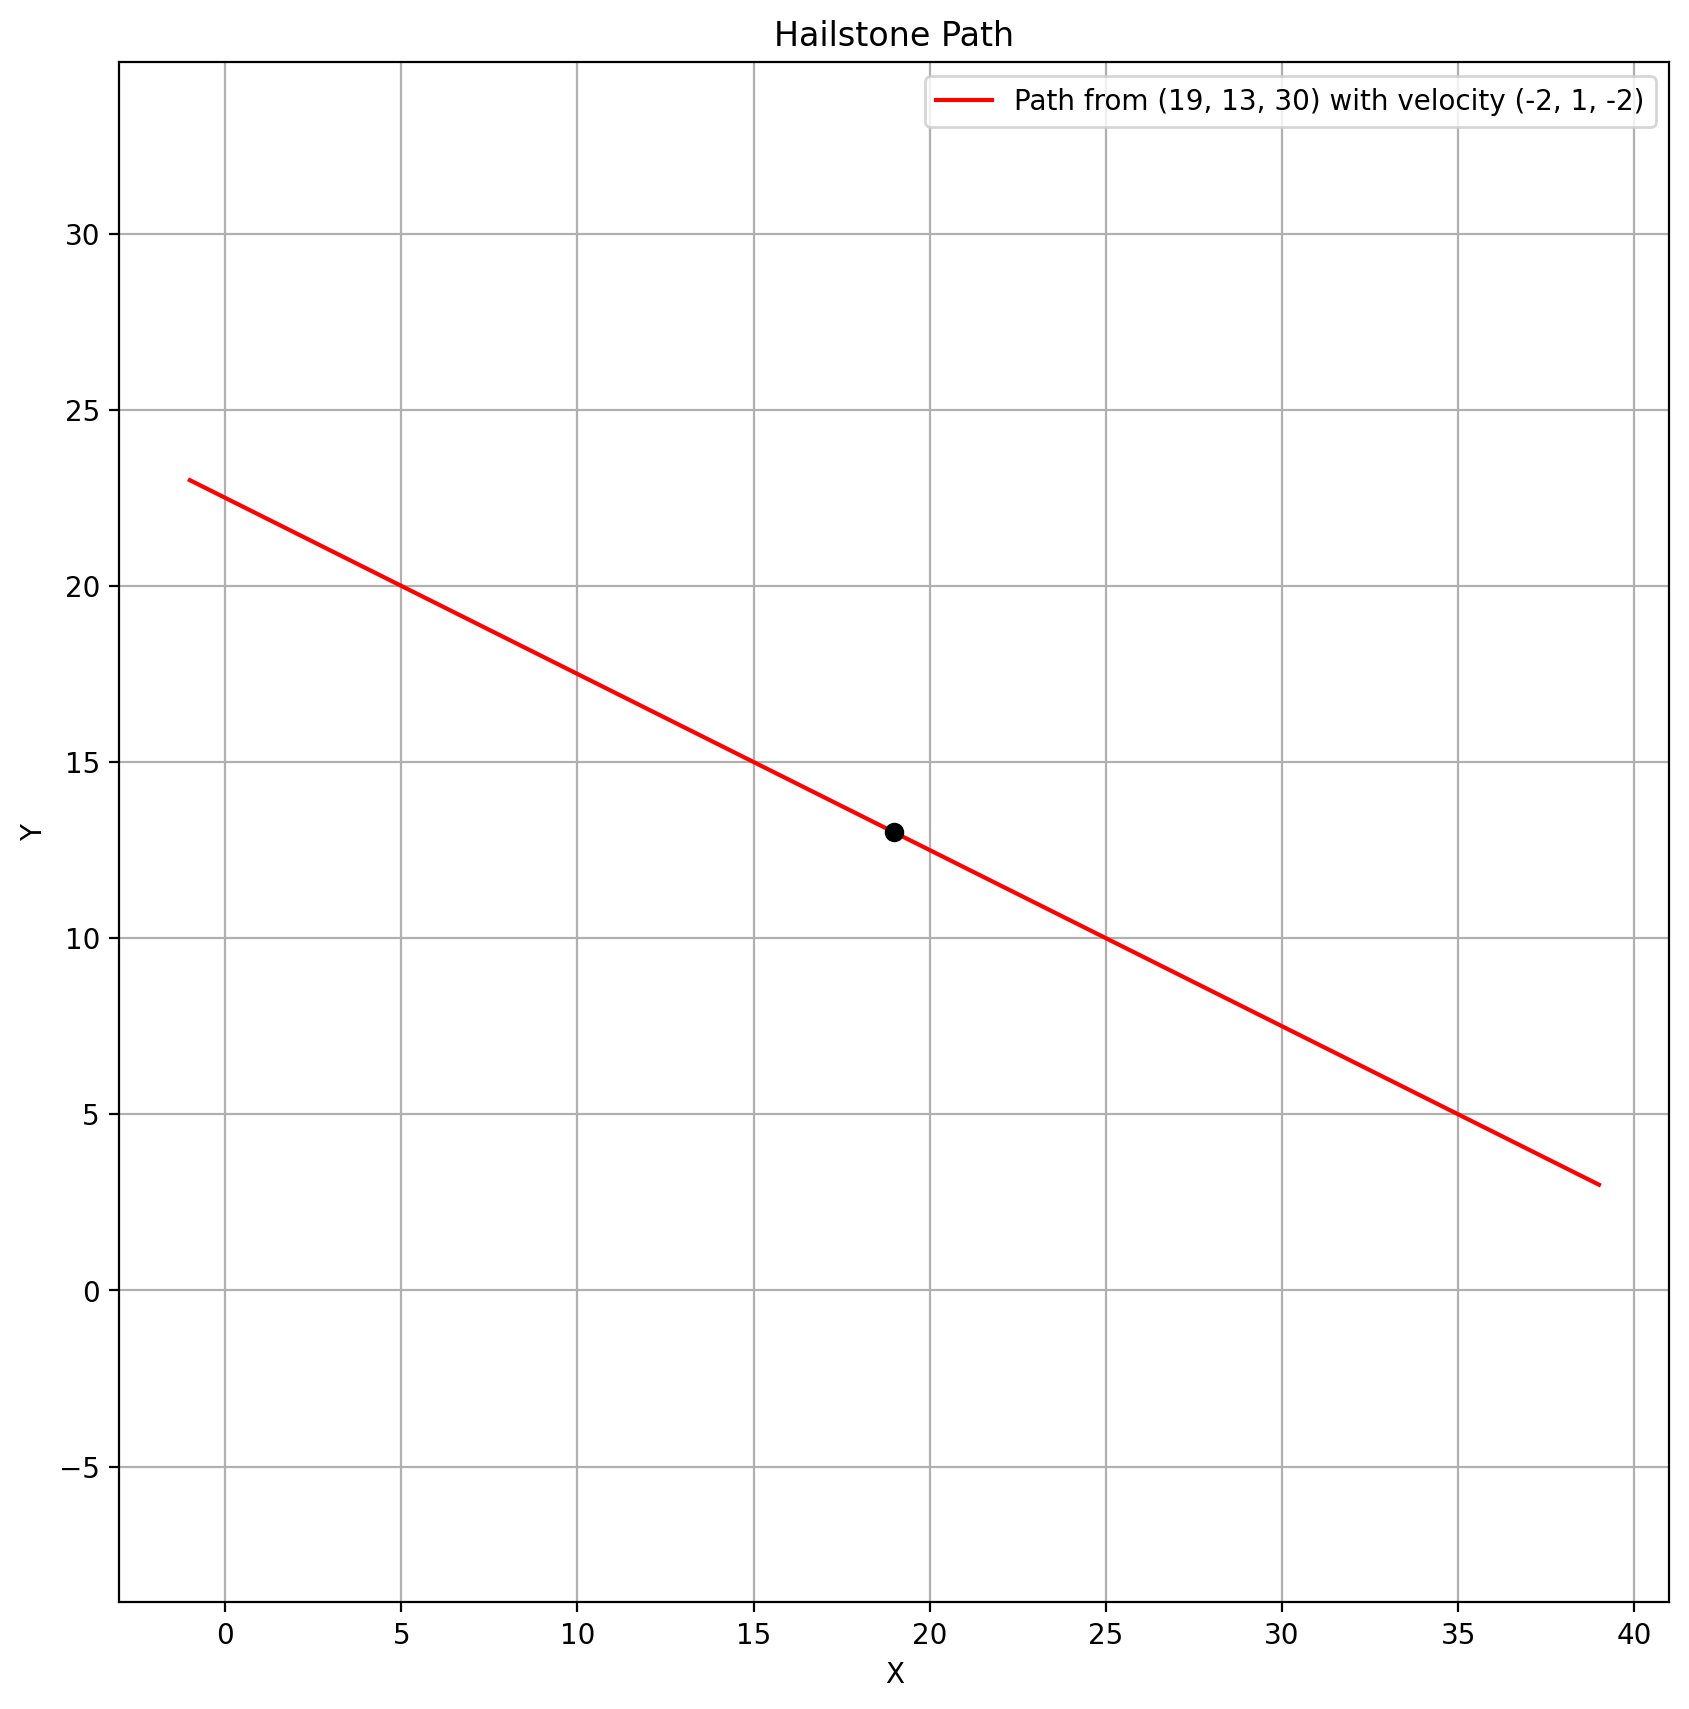

In [ ]:
first_path = sample_records[0]
plot_path(first_path[0],first_path[1])

**AI Prompt**

Please enhance the plotting function to take an optional named argument "region", which is a `tuple[tuple,tuple]`, where the first element represents minx and miny coordianates, the second represents maxx and maxy coordinates. The plot function should shade the region defined by that variable

**AI Response**

```python
def plot_path(pos: tuple[int, int], velocity: tuple[int, int], region: tuple[tuple[int,int], tuple[int,int]] = None):
    import matplotlib.pyplot as plt
    import numpy as np
    
    # Create points along the line
    t = np.linspace(-10, 10, 100)
    x = pos[0] + velocity[0] * t
    y = pos[1] + velocity[1] * t
    
    # Create the plot
    plt.figure(figsize=(10, 10))
    
    # If region is specified, shade it
    if region:
        (minx, miny), (maxx, maxy) = region
        plt.fill([minx, maxx, maxx, minx], 
                [miny, miny, maxy, maxy], 
                alpha=0.2, color='gray', label='Test Region')
    
    plt.plot(x, y, 'r-', label=f'Path from {pos} with velocity {velocity}')
    
    # Add grid and labels
    plt.grid(True)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Hailstone Path')
    plt.axis('equal')
    
    # Add legend
    plt.legend()
    
    # Mark starting point
    plt.plot(pos[0], pos[1], 'ko', label='Start')
    
    plt.show()
```

You can test it with:
```python
plot_path((19, 13), (-2, 1), region=((7,7), (27,27)))
```

Would you like to try it out?

In [ ]:
def plot_path(pos: tuple, velocity: tuple, region: tuple = None):
    import matplotlib.pyplot as plt
    import numpy as np
    
    # Create points along the line
    t = np.linspace(-10, 10, 100)
    x = pos[0] + velocity[0] * t
    y = pos[1] + velocity[1] * t
    
    # Create the plot
    plt.figure(figsize=(10, 10))
    
    # If region is specified, shade it
    if region:
        (minx, miny), (maxx, maxy) = region
        plt.fill([minx, maxx, maxx, minx], 
                [miny, miny, maxy, maxy], 
                alpha=0.2, color='gray', label='Test Region')
    
    plt.plot(x, y, 'r-', label=f'Path from {pos} with velocity {velocity}')
    
    # Add grid and labels
    plt.grid(True)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Hailstone Path')
    plt.axis('equal')
    
    # Add legend
    plt.legend()
    
    # Mark starting point
    plt.plot(pos[0], pos[1], 'ko', label='Start')
    
    plt.show()

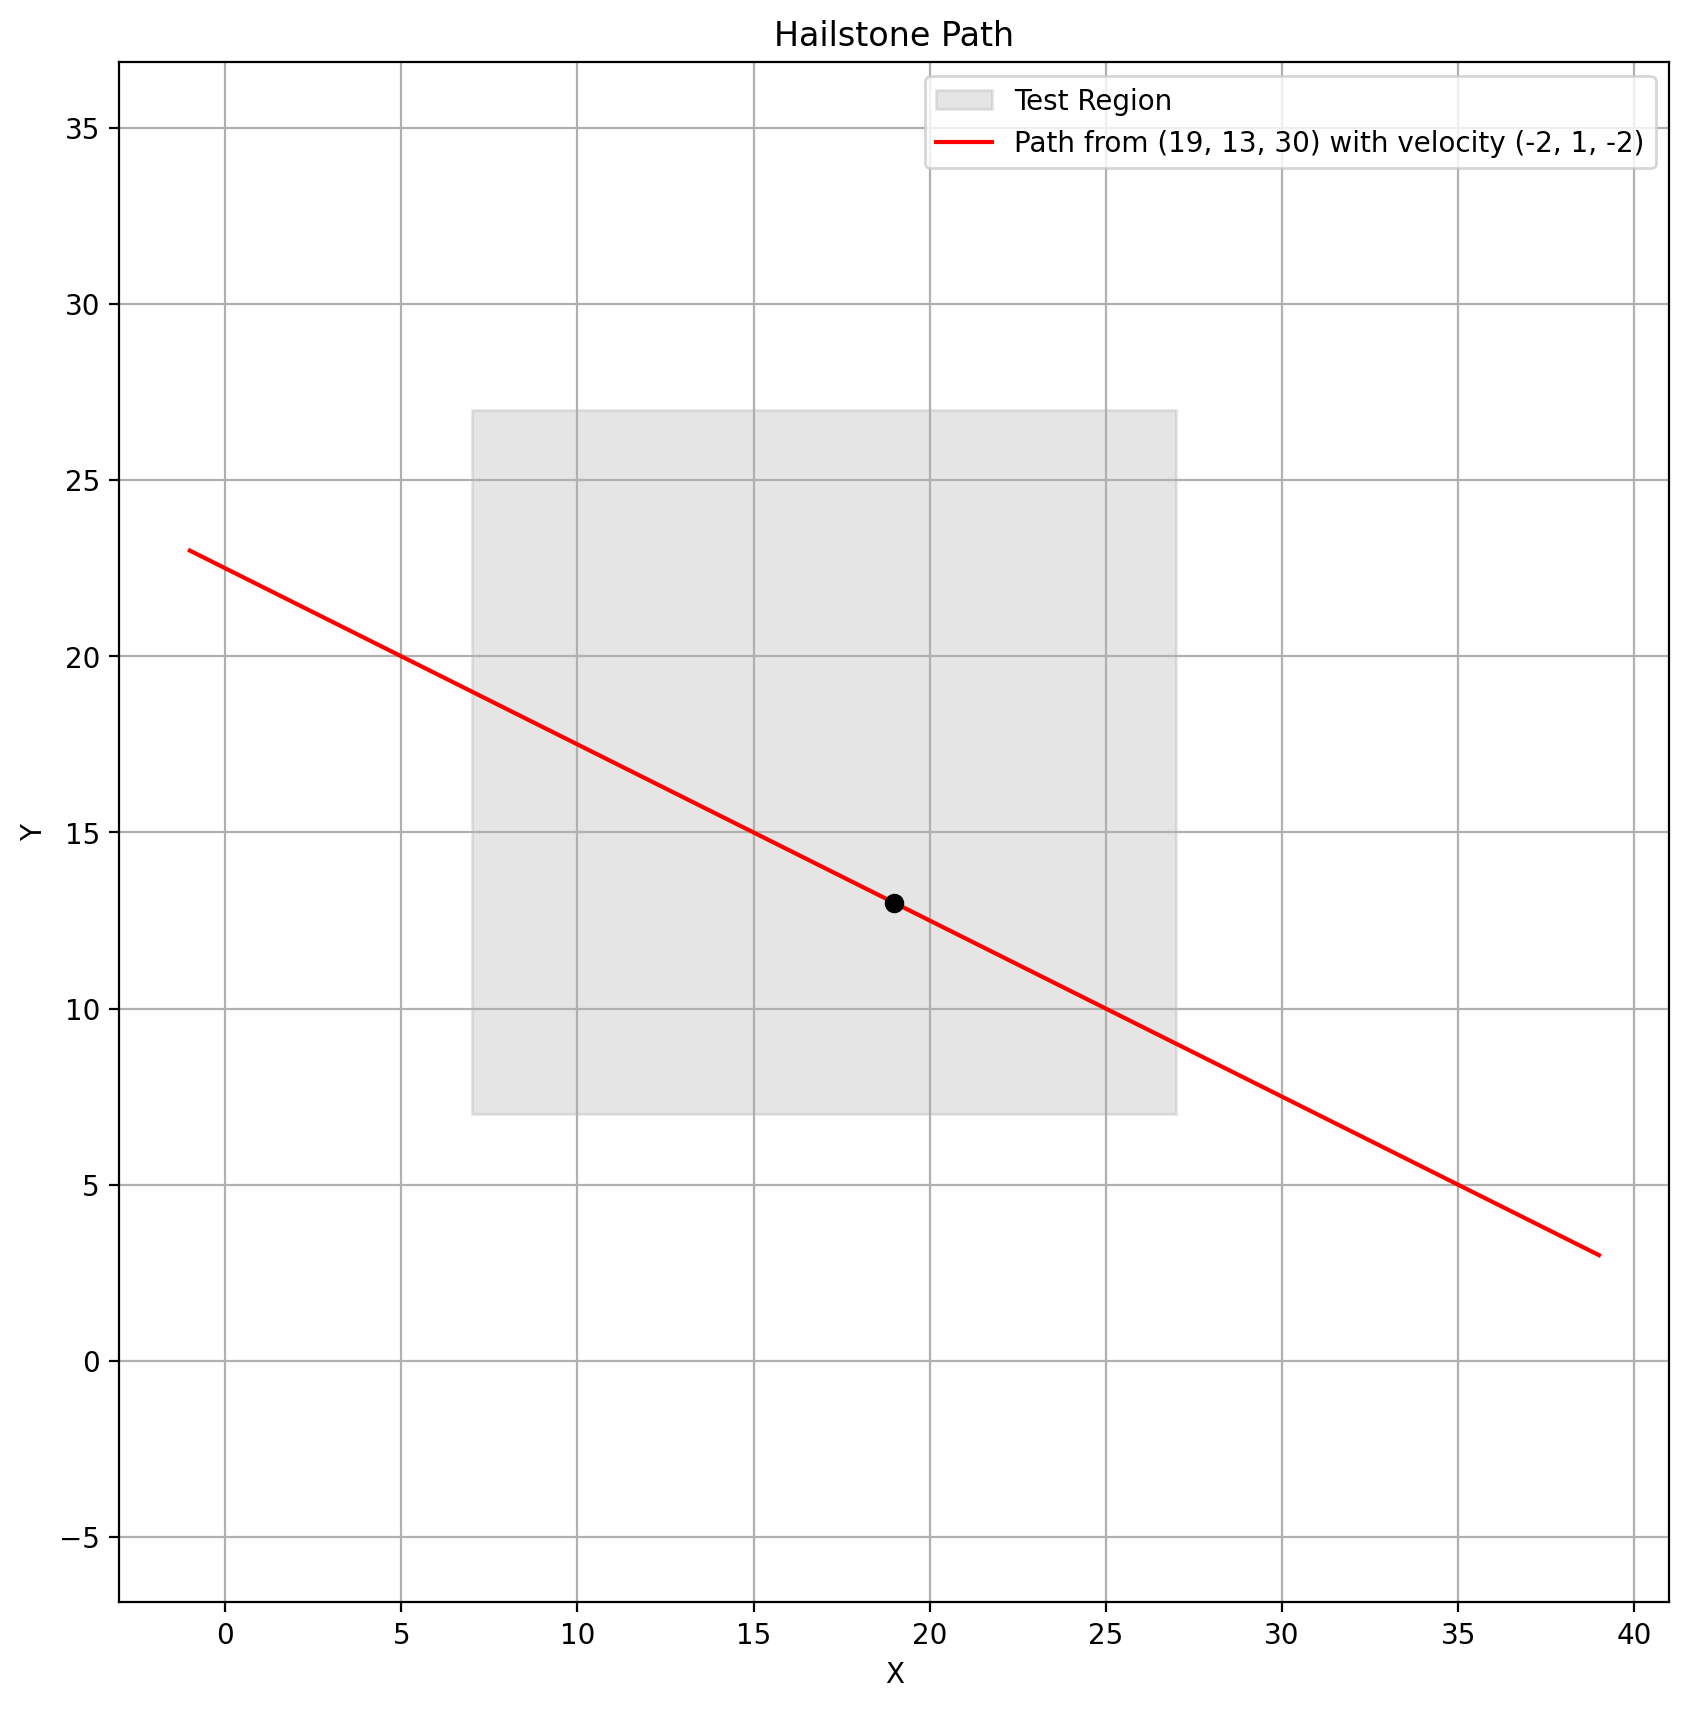

In [ ]:
first_path = sample_records[0]
plot_path(first_path[0],first_path[1], region=((7,7),(27,27)))

**AI Prompt**

Generalize the function take a list of plots

**AI Response**

```python
def plot_paths(paths: list[tuple[tuple, tuple]], region: tuple[tuple[int,int], tuple[int,int]] = None):
    import matplotlib.pyplot as plt
    import numpy as np
    
    # Create the plot
    plt.figure(figsize=(10, 10))
    
    # If region is specified, shade it
    if region:
        (minx, miny), (maxx, maxy) = region
        plt.fill([minx, maxx, maxx, minx], 
                [miny, miny, maxy, maxy], 
                alpha=0.2, color='gray', label='Test Region')
    
    # Plot each path
    colors = plt.cm.rainbow(np.linspace(0, 1, len(paths)))
    for (pos, velocity), color in zip(paths, colors):
        t = np.linspace(-10, 10, 100)
        x = pos[0] + velocity[0] * t
        y = pos[1] + velocity[1] * t
        
        plt.plot(x, y, '-', color=color, 
                label=f'Path from {pos[:2]} with velocity {velocity[:2]}')
        plt.plot(pos[0], pos[1], 'o', color=color)  # Starting point
    
    # Add grid and labels
    plt.grid(True)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Hailstone Paths')
    plt.axis('equal')
    
    # Add legend
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    plt.show()
```

You can test it with:
```python
plot_paths(sample_records, region=((7,7), (27,27)))
```

This version:
- Takes a list of paths
- Uses different colors for each path
- Moves the legend outside to avoid overlap
- Uses tight_layout to adjust spacing

Would you like to try it out?

In [ ]:
def plot_paths(paths: list[tuple[tuple, tuple]], region: tuple[tuple[int,int], tuple[int,int]] = None):
    import matplotlib.pyplot as plt
    import numpy as np
    
    # Create the plot
    plt.figure(figsize=(10, 10))
    
    # If region is specified, shade it
    if region:
        (minx, miny), (maxx, maxy) = region
        plt.fill([minx, maxx, maxx, minx], 
                [miny, miny, maxy, maxy], 
                alpha=0.2, color='gray', label='Test Region')
    
    # Plot each path
    colors = plt.cm.rainbow(np.linspace(0, 1, len(paths)))
    for (pos, velocity), color in zip(paths, colors):
        t = np.linspace(-10, 10, 100)
        x = pos[0] + velocity[0] * t
        y = pos[1] + velocity[1] * t
        
        plt.plot(x, y, '-', color=color, 
                label=f'Path from {pos[:2]} with velocity {velocity[:2]}')
        plt.plot(pos[0], pos[1], 'o', color=color)  # Starting point
    
    # Add grid and labels
    plt.grid(True)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Hailstone Paths')
    plt.axis('equal')
    
    # Add legend
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    plt.show()

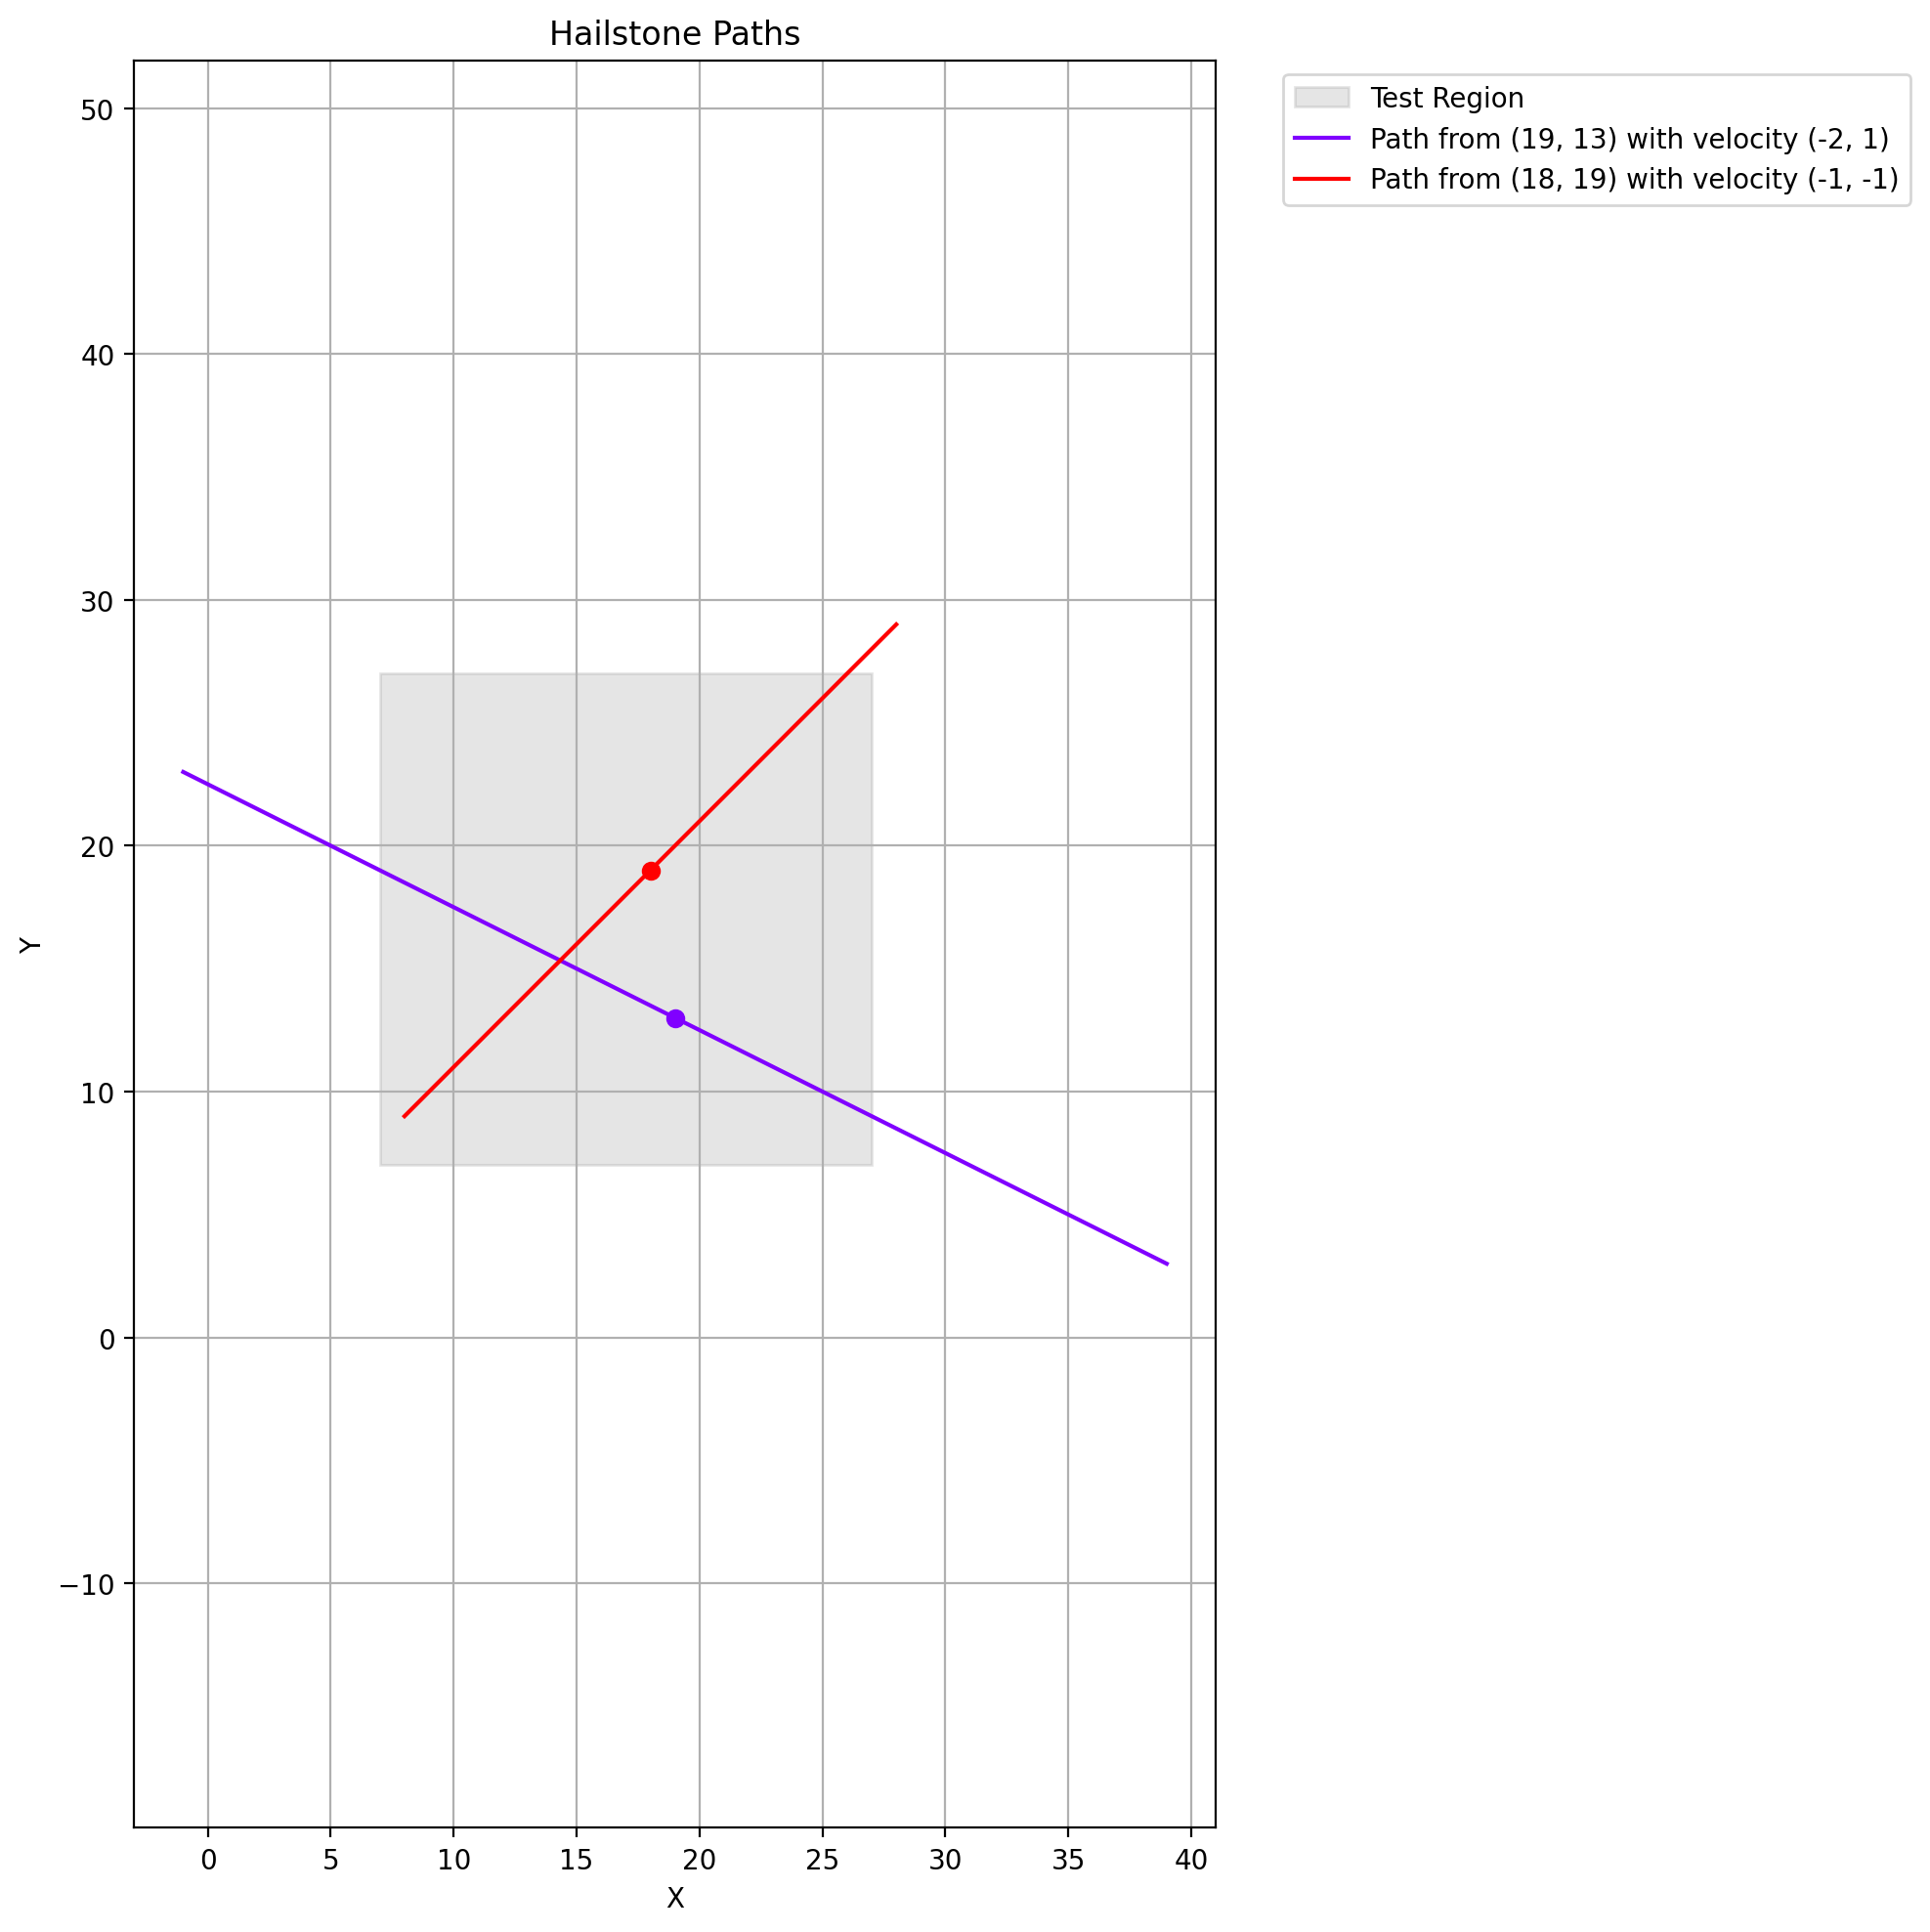

In [ ]:
plot_paths(sample_records[0:2],region=((7,7),(27,27)))

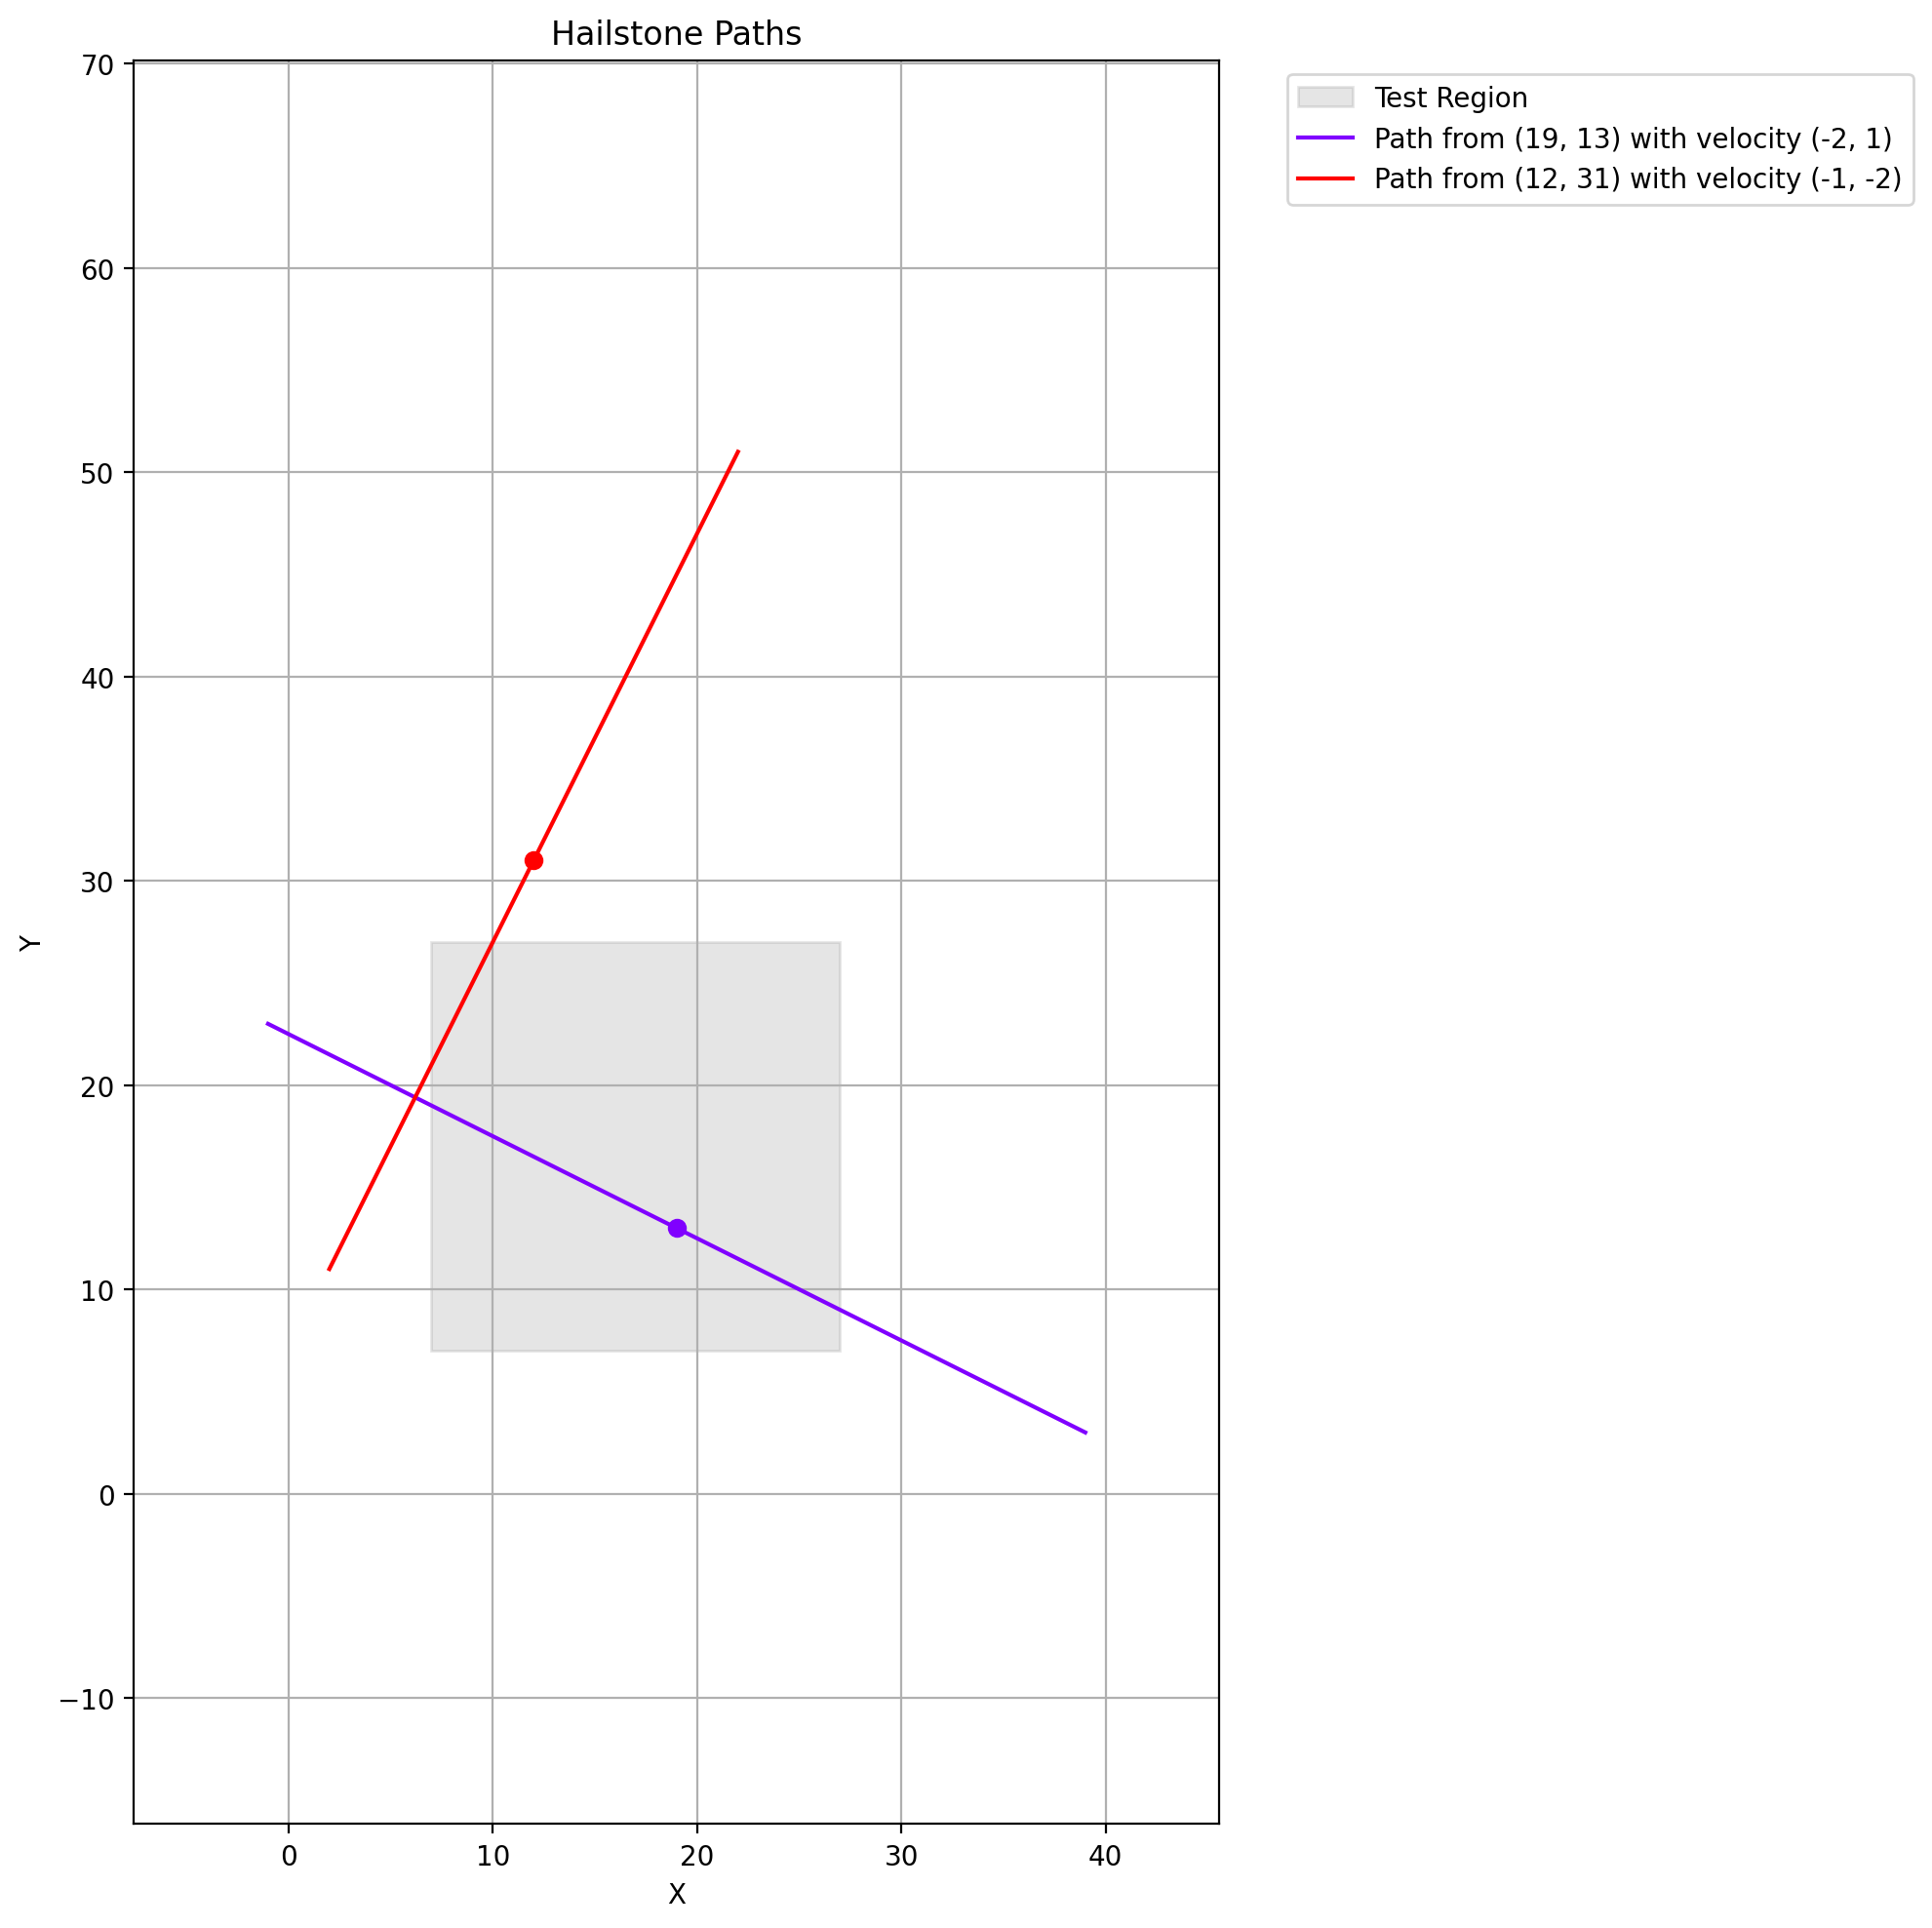

In [ ]:
plot_paths([sample_records[0],sample_records[3]],region=((7,7),(27,27)))

**AI Prompt**

Reviewing the above, you will see that every record consists of a position tuple and a velocity tuple. Together they define a linear path, a line. 

I want an efficient way, given two paths, to determine if there is a point where they intersect.

This seems to me to be a problem which can be solved by using an existing linear algebra or other mathematical library to find the solution to a set of linear equations.

Please can you describe if this approach makes sens?

**AI Response**

Yes, this is exactly right! The problem can be solved using linear algebra. Here's why:

For each path, we can write a parametric equation:
- Path 1: P1(t) = pos1 + t * vel1
- Path 2: P2(s) = pos2 + s * vel2

Where t and s are scalar parameters. At intersection:
P1(t) = P2(s)

This gives us a system of linear equations:
pos1.x + t*vel1.x = pos2.x + s*vel2.x
pos1.y + t*vel1.y = pos2.y + s*vel2.y

This can be solved using numpy's linear algebra functions. Would you like me to explain how to set up these equations in matrix form, or would you prefer to try implementing it yourself first?

**AI Prompt**

To be clear, for now, I am interested in ignoring the 3rd spatial dimension z. I only want to check if the paths define two lines A and B which intersect in space. If they do, I want to know the (x,y) coordinates of intersection. And then I'd like to know at what time A passed through the intersection point P, and at what time B passed through the intersection point P. THere is no requirements that the paths intersecrt in time.

**AI Response**

Yes, I understand. Let me clarify what we're solving:

1. We have two 2D lines defined parametrically:
   - Line A: (x,y) = (pos1.x, pos1.y) + t * (vel1.x, vel1.y)
   - Line B: (x,y) = (pos2.x, pos2.y) + s * (vel2.x, vel2.y)

2. We want to find:
   - IF they intersect in space (they might be parallel)
   - IF they do intersect:
     - The point P = (x,y) where they intersect
     - The time t when path A reaches P
     - The time s when path B reaches P

The times t and s could be negative (meaning the intersection happened "in the past"), positive (future), or zero (right now).

Would you like me to show how to set this up as a matrix equation that we can solve with numpy?

**AI Prompt**

Yes, please.

**AI Response**

Let me show you how to set up the matrix equation. 

At the intersection point:
pos1.x + t*vel1.x = pos2.x + s*vel2.x
pos1.y + t*vel1.y = pos2.y + s*vel2.y

We can rearrange this to:
t*vel1.x - s*vel2.x = pos2.x - pos1.x
t*vel1.y - s*vel2.y = pos2.y - pos1.y

In matrix form, this becomes:
```
[vel1.x  -vel2.x] [t] = [pos2.x - pos1.x]
[vel1.y  -vel2.y] [s]   [pos2.y - pos1.y]
```

We can solve this using numpy.linalg.solve(A, b) where:
- A is the 2x2 matrix of velocities
- b is the vector of position differences

Would you like me to show you the numpy implementation?

**AI Prompt**

Yes, please

**AI Response**

```python
def find_intersection(path1: tuple[tuple, tuple], path2: tuple[tuple, tuple]):
    import numpy as np
    
    pos1, vel1 = path1
    pos2, vel2 = path2
    
    # Create the coefficient matrix A
    A = np.array([
        [vel1[0], -vel2[0]],
        [vel1[1], -vel2[1]]
    ])
    
    # Create the right-hand side vector b
    b = np.array([
        pos2[0] - pos1[0],
        pos2[1] - pos1[1]
    ])
    
    try:
        # Solve the system of equations
        t, s = np.linalg.solve(A, b)
        
        # Calculate intersection point
        intersection = (pos1[0] + t*vel1[0], pos1[1] + t*vel1[1])
        
        return {
            'intersects': True,
            'point': intersection,
            'time1': t,
            'time2': s
        }
    except np.linalg.LinAlgError:
        # Lines are parallel or coincident
        return {'intersects': False}
```

This will return either:
- A dictionary with the intersection point and times if the lines intersect
- A dictionary with just `intersects: False` if they don't

Would you like to test it with some of your sample paths?

In [ ]:
def find_intersection(path1: tuple[tuple, tuple], path2: tuple[tuple, tuple]):
    import numpy as np
    
    pos1, vel1 = path1
    pos2, vel2 = path2
    
    # Create the coefficient matrix A
    A = np.array([
        [vel1[0], -vel2[0]],
        [vel1[1], -vel2[1]]
    ])
    
    # Create the right-hand side vector b
    b = np.array([
        pos2[0] - pos1[0],
        pos2[1] - pos1[1]
    ])
    
    try:
        # Solve the system of equations
        t, s = np.linalg.solve(A, b)
        
        # Calculate intersection point
        intersection = (pos1[0] + t*vel1[0], pos1[1] + t*vel1[1])
        
        return {
            'intersects': True,
            'point': intersection,
            'time1': t,
            'time2': s
        }
    except np.linalg.LinAlgError:
        # Lines are parallel or coincident
        return {'intersects': False}

In [ ]:
(a,b) = (0,3)
def f(a,b):
    return find_intersection(path1=sample_records[a],path2=sample_records[b])
f(a,b)

{'intersects': True,
 'point': (6.199999999999999, 19.4),
 'time1': 6.4,
 'time2': 5.8}

In [ ]:
(a,b) = (1,2)
def f(a,b):
    return find_intersection(path1=sample_records[a],path2=sample_records[b])
f(a,b)

{'intersects': False}

predicates:
- do_paths_intersect(path1,path2,region:Region,time='future'|'past')
- which uses: intersection_point(path1,path2) -> None|tuple[float,float]

In [ ]:
def will_paths_intersect(path1,path2,region:tuple) -> bool:
    d = find_intersection(path1,path2)
    if d['intersects'] == False: return False
    if not (d['time1'] >= 0 and d['time2'] >= 0): return False
    p = d['point']
    minx,miny,maxx,maxy = region
    return (minx <= p[0] <= maxx and miny <= p[1] <= maxy)

In [ ]:
(a,b) = (1,2)
def g(a,b):
    return will_paths_intersect(sample_records[a],sample_records[b],(7,7,27,27))
g(a,b)

False

In [ ]:
(a,b) = (0,4)
def g(a,b):
    return will_paths_intersect(sample_records[a],sample_records[b],(7,7,27,27))
g(a,b)

False

In [ ]:
(a,b) = (0,1)
def g(a,b):
    return will_paths_intersect(sample_records[a],sample_records[b],(7,7,27,27))
g(a,b)

True

In [ ]:
def all_pairs(xs):
    for i in range(len(xs)):
        for j in range(i,len(xs)):
            if i<j:
                yield (xs[i],xs[j])

In [ ]:
list(all_pairs( sample_records))

[(((19, 13, 30), (-2, 1, -2)), ((18, 19, 22), (-1, -1, -2))),
 (((19, 13, 30), (-2, 1, -2)), ((20, 25, 34), (-2, -2, -4))),
 (((19, 13, 30), (-2, 1, -2)), ((12, 31, 28), (-1, -2, -1))),
 (((19, 13, 30), (-2, 1, -2)), ((20, 19, 15), (1, -5, -3))),
 (((18, 19, 22), (-1, -1, -2)), ((20, 25, 34), (-2, -2, -4))),
 (((18, 19, 22), (-1, -1, -2)), ((12, 31, 28), (-1, -2, -1))),
 (((18, 19, 22), (-1, -1, -2)), ((20, 19, 15), (1, -5, -3))),
 (((20, 25, 34), (-2, -2, -4)), ((12, 31, 28), (-1, -2, -1))),
 (((20, 25, 34), (-2, -2, -4)), ((20, 19, 15), (1, -5, -3))),
 (((12, 31, 28), (-1, -2, -1)), ((20, 19, 15), (1, -5, -3)))]

In [ ]:
def count_future_intersections(paths,region=(7,7,27,27)):
    intersections = (1 if will_paths_intersect(pr[0],pr[1],region) else 0 for pr in all_pairs(paths))
    return sum(intersections)

In [ ]:
count_future_intersections(sample_records)

2

In [ ]:
from aocd import get_data
inp = get_data(day=24, year=2023)

In [ ]:
count_future_intersections( parse_records(inp) )

0

In [ ]:
count_future_intersections( parse_records(inp),region=(200000000000000,200000000000000,400000000000000,400000000000000) )

18184

In [ ]:
len(parse_records(inp))

300

In [ ]:
inp_records = parse_records(inp)
inp_records[:20]

[((320870677764563, 335750934489987, 282502845957937), (-40, -24, 10)),
 ((219235623600942, 408022798608755, 245679379684914), (127, -45, 66)),
 ((171834827764229, 225154401936948, 232302441670972), (-122, -521, 95)),
 ((399408000414510, 365475460204869, 325051385807860), (-110, -35, -35)),
 ((382531108862210, 229601570088564, 368913364777462), (-119, 127, -107)),
 ((149909452680584, 220522474055239, 215024246295982), (198, -73, 190)),
 ((234205136344037, 217641496634781, 245767047966874), (50, 126, 57)),
 ((154245972353770, 254717416188789, 165260557711000), (191, 37, 220)),
 ((369540770291762, 356366422983125, 93794725449906), (-15, 24, 216)),
 ((226276010405492, 209995120939680, 310956910929616), (-25, 99, -149)),
 ((268638972773930, 269486309393569, 248987782583720), (-21, 26, 50)),
 ((361178860307414, 374454477296229, 399143377389604), (-6, 7, -83)),
 ((202257892924214, 270170054947827, 246834210935308), (-51, -252, 15)),
 ((277024186353899, 205267962954879, 342506025642424), (-17

# part 2

Seems different.

Instead of checking if two 2 paths are in the same finite-measure region of 2d-space and half-of-all-time, we now need to find a path which exactly intersect in every other path intersects in space and time, at some point for every other path.

Solving instead of testing.

First thoughts on approach:
- can this second problem be regarded as a version of the first problem in _some_ way? with some dimensional transformation?
- what does it look like. ifwe simplify the 2nd problem to fewer dimension?

two path may be described as follows:

p = (px + vx *t, py + vy * t, pz + vz*t)
q = (qx + wx +s, qy + wy * s, qz + wz*s)

exact collision means:

there exists a value T and. a point P st. T=s=t and P=p=q

If P is given, then there are a range of qs which intersect. 

If P1 and P2 are given, there are two ranges. The intersection of those ranges is. the space of solutions to both.